# Artificial Intelligence

### 신경 스타일 전이라 불리는(Neural Style Transfer) 논문은 
### 반 고흐의 <<별이 빛나는 밤에>> 라는 그림과 일반적인 풍경 사진을 합성해서 
### 마치 반 고흐가 그린 것 같은 스타일의 풍경 이미지를 만들어 냈습니다.
---
---
### 그 뿐만 아니라 어떤 것이든 서로 다른 2장의 이미지 A,B 가 있다면 
### A 이미지에서는 스타일을, B 이미지에서는 내용을 가져와 
### 두 이미지의 스타일과 내용이 합성된 
### 제 3의 이미지를 만들어 낼 수 있었습니다.
---
---
### 실제로 어플리케이션 Prisma, 웹 DeepDreamGenerator은 이러한 알고리즘을 
### 탑재하기도 하였죠. 

---
---
### 이번 수업에서는 먼저 한 장의 이미지를 재생성하는 
### '텍스쳐 합성(Texture Synthesis)'에 대하여 알아본 뒤 
### 2장의 이미지에서 각각 스타일과 내용을 가져와서 합성하는 
### '신경 스타일 전이'에 대해 공부해보도록 하겠습니다. 
--- 

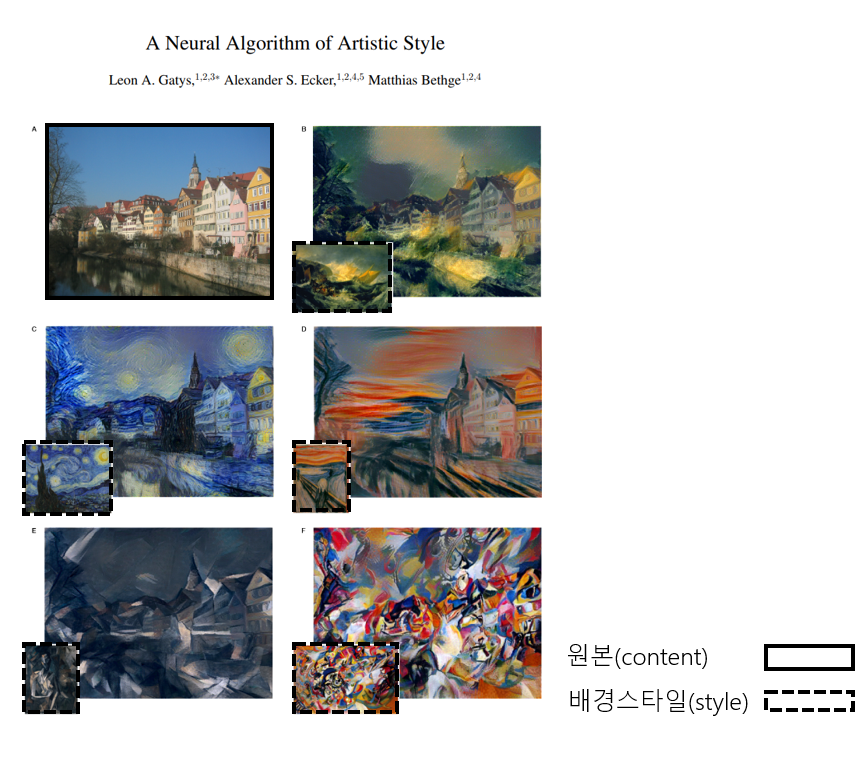

* 참고문헌 
  * A Neural Algorithm of Artistic Style : https://arxiv.org/pdf/1508.06576.pdf
  * Texture Synthesis Using Convolutional Neural
Networks : https://arxiv.org/pdf/1505.07376.pdf

### 합성곱 신경망을 사용한 **텍스처 합성**
### 텍스처(Texture)는 넓은 의미로는 단순한 '이미지'이지만 
### 컴퓨터 비전에서 쓰이는 의미는 조금 다릅니다. 
### 컴퓨터 비전에서의 텍스처는 **지역적으로는 비교적 다양한 값**을 가지면서 
### **전체적으로는 비슷한 모습을 보이는 이미지**를 뜻합니다. 
---
---
### 예를들어 **화장실 타일, 땅, 지붕, 섬유**를 보면 
### 앞서 이야기한 조건에 해당하는 **일정한 패턴**을 관찰할 수 있습니다. 
### 이 패턴은 **전체적으로는 비슷**하지만 **지역적으로는 서로 조금씩 다르죠**.
---
---



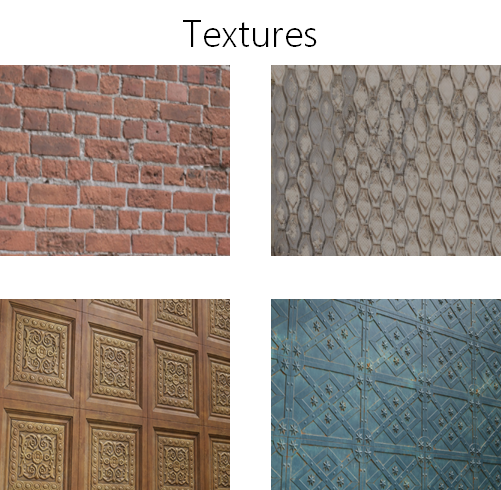

### 텍스처 합성(Texture Synthesis)은 한 장의 이미지를 원본으로 삼아 
### 해당 텍스처를 재생성(합성)하는 작업입니다.

### 이때 합성되는 이미지는 원본과 비슷해야 하지만 똑같아서는 안 됩니다. 
### 단순 복사가 아니기 때문이죠.
### 어색한 부분과 반복적인 부분이 없어야 하며, 
### 원하는 크기로 생성 가능해야 하죠. 

---
---

### 기존의 텍스처 합성 방법 중 
### 가장 효과적이었던 방법은 크게 두 가지로 분류할 수 있습니다.

---
---

### 첫 번째는 픽셀이나 이미지를 잘게 쪼갠 단위인 
### **Patch(조각)**를 재배열 하는 방법입니다. 
### 2009년에 Connelly Barnes 등이 발표한 **Patch Match** 가 대표적입니다. 
### 이 연구에는 포토샵으로 유명한 **Adobe**의 연구원들도 공저자로 참여했습니다. 
### 그 후 **포토샵**에는 **선택 영역에 주변과 비슷한 이미지를 채우는** 
### **Content-Aware Fill 기능**이 들어갔는데, 
### 바로 이 **Patch Match 알고리즘**을 최적화 한 버전입니다.

---
---


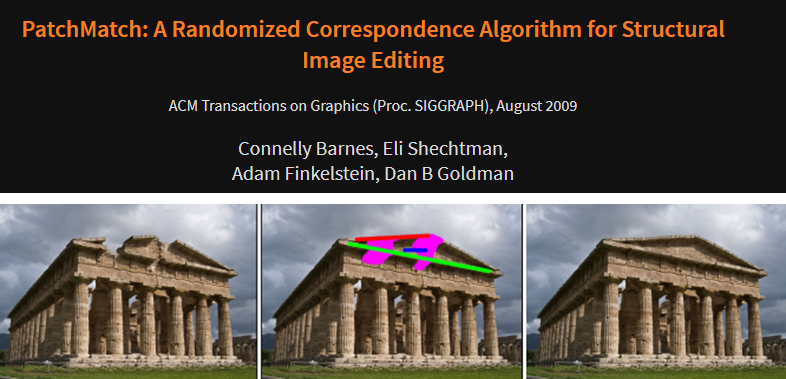


### 두 번째 방법은 '파라미터'에 의한 **텍스처 모델링** 입니다. 
### 먼저 원본 텍스처의 **공간적인 통곗값(spatial statistics)**을 
### 사람이 정교하게 만든 여러 개의 필터(hand-crafted)로 구합니다. 
### 이 공간적 통곗값을 '파라미터'라고 부르겠습니다.

### 마찬가지로 타겟 텍스처 또한 필터를 통과하여 공간적 통곗값을 구합니다.
### 이렇게 필터를 통과한 타깃 텍스처와 원본 텍스처 결과물이 같다면 
### 같은 텍스처라고 가정하는 것 이죠. 
### 이러한 방법으로 결과물이 같아질 때까지 타깃 텍스처를 변형시키게 됩니다.

---
---

### 그렇다면 여기서 필터의 값이 생각보다 중요한 역할을 한다는 것을 
### 알 수 있습니다. 
### 그리고 딥러닝이 잘 하는 것 중 하나가 필터의 값을 학습하는 것입니다. 
### 이러한 방법을 텍스처 합성에 적용한 논문이 
### << Texture Synthesis Using Convolution Neural Networks>> 이죠.

### 필터를 수작업으로 제작하는 방식에서 
### 이미지 기반 합성곱 신경망에서 만들어진 필터로 교체하기 위해 
### 논문에서는 VGG-19 신경망을 사용하였습니다. 

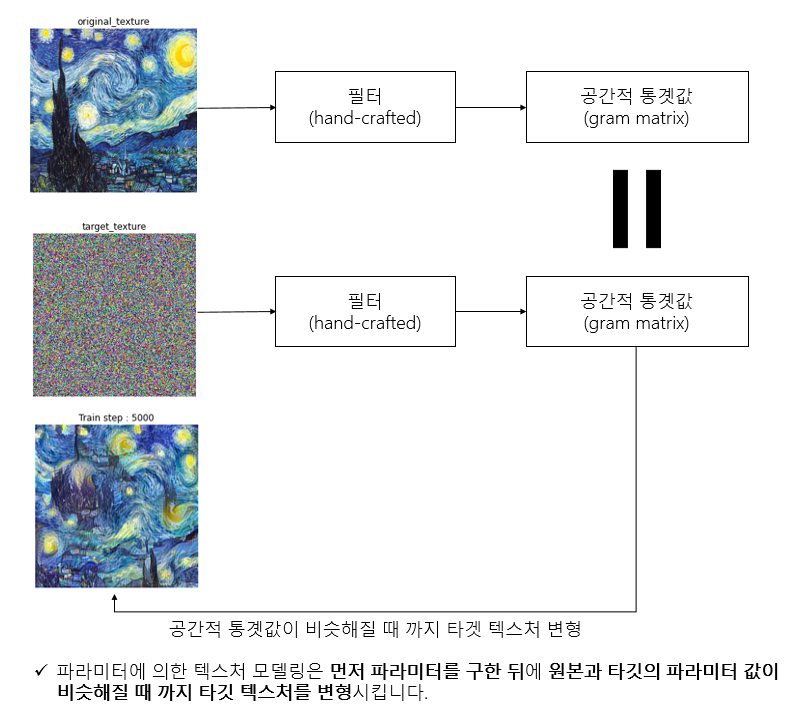

# 전체적인 신경망 구조

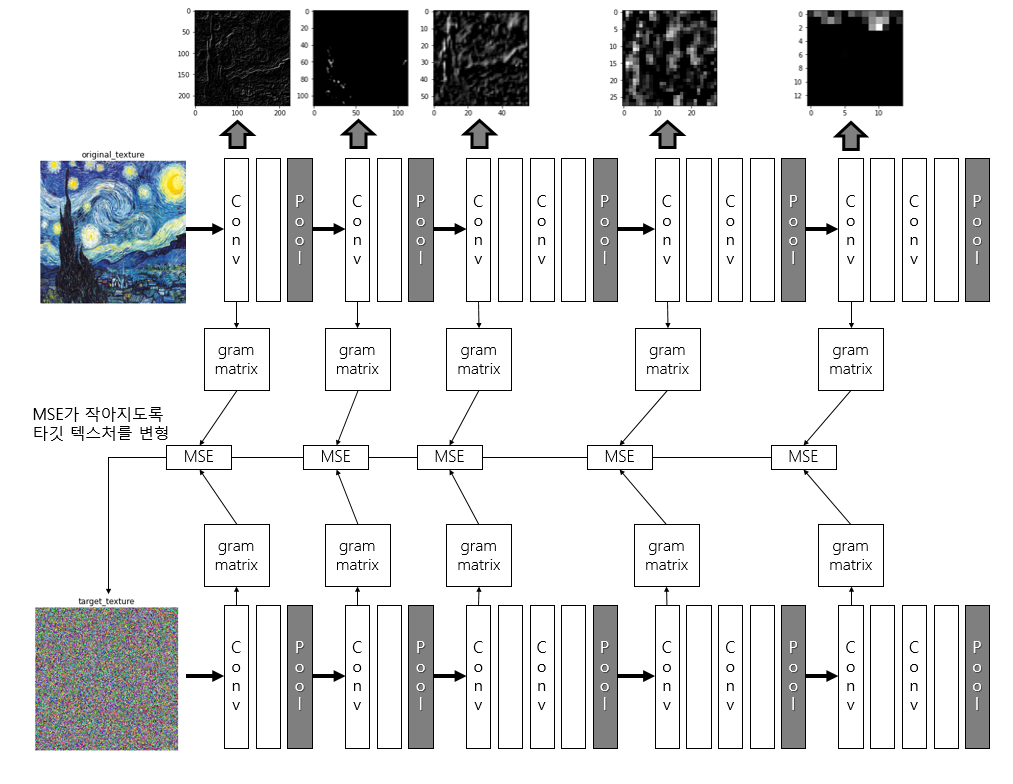

### 그럼 이제 코드를 작성해가며 학습을 수행해보도록 하겠습니다. 

*  준비물   : 텍스처 합성을 수행할 이미지
*  사용방법 : 여러분은 사진 경로를 넣는 부분에만 여러분의 사진 경로를 입력해 
주세요. 
* GPU로 셋팅하고 코드를 작성하도록 합시다. 
 

  ※주의 사항 : 사진은 jpg 포멧을 사용해 주세요.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

## ★ 텍스처 이미지 불러오기 및 픽셀 정규화.(min-max norm) 
## 화풍에 해당하는 사진을 넣어주세요.  

In [4]:
# 본 코드는 예제용 이미지를 불러오는 과정입니다. 
#style_path = tf.keras.utils.get_file('style.jpg', 'http://bit.ly/2mGfZIq')

# 이미지를 읽어오는 과정입니다. 
#style_image = plt.imread(style_path)

#####################################################

# 원하는 스타일 이미지를 넣게되는 코드입니다. 
style_image = plt.imread('/content/my_image.jpg')

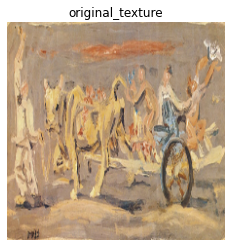

In [5]:
# 이미지 크기는 자유롭게 설정할 수 있습니다. 
style_image = cv2.resize(style_image, dsize = (224,224))

# min-max normalization 과정을 진행하겠습니다. 
style_image = style_image/ 255.0

plt.title('original_texture')
plt.imshow(style_image)
plt.axis('off')
plt.show()

# 타겟 텍스처 생성 
 * 위에서 불러온 이미지와 같은 차원을 갖는 랜덤 노이즈 생성
 * tf.random.uniform() : 균등분포로 부터 난수값을 반환, 즉 모든 픽셀에 대하여 0~1 사이의 난수값을 반환

style_image_shape :  (224, 224, 3)
좌측 최상단(target_image[0,0,:]) : 
 tf.Tensor([0.53207624 0.49579144 0.08954179], shape=(3,), dtype=float32)


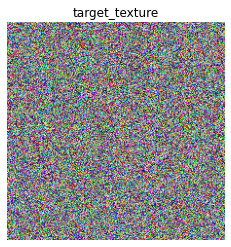

In [6]:
# tf.random.uniform()에 예제로 가지고온 이미지의 shape 값을 할당하여 
# 타깃 텍스처를 생성해 주겠습니다.  
style_image_shape = style_image.shape
print("style_image_shape : ", style_image_shape)

# 타깃 텍스처의 초깃값은 무작위 값을 할당하여 화이트 노이즈 값을 얻어냅니다.)
target_image = tf.random.uniform(style_image.shape)
print("좌측 최상단(target_image[0,0,:]) : \n", target_image[0,0,:])
plt.title('target_texture')
plt.imshow(target_image)
plt.axis('off')
plt.show()

In [11]:
# 텍스처 합성에 사용할 vgg-19 신경망을 불러오겠습니다. 
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

# include_top : 마지막 Dense 레이어를 불러올 것인가? 
# 지금 우리는 출력계층을 따로 만들 이유가 없기에 False를 줍니다.

# include_top = True 인 경우 flatten, fc1, fc2, predictions 계층 포함 
# weights : 가중치가 학습된 데이터세트는 imagenet을 사용하도록 하겠습니다. 
vgg = VGG19(include_top=False, weights = 'imagenet')

In [12]:
# vgg19 신경망에 포함된 각 레이어들의 이름을 출력합니다. 
# 당연하게도 분류를 위한 마지막 계층은 제외되었습니다. 
for layer in vgg.layers:
    print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


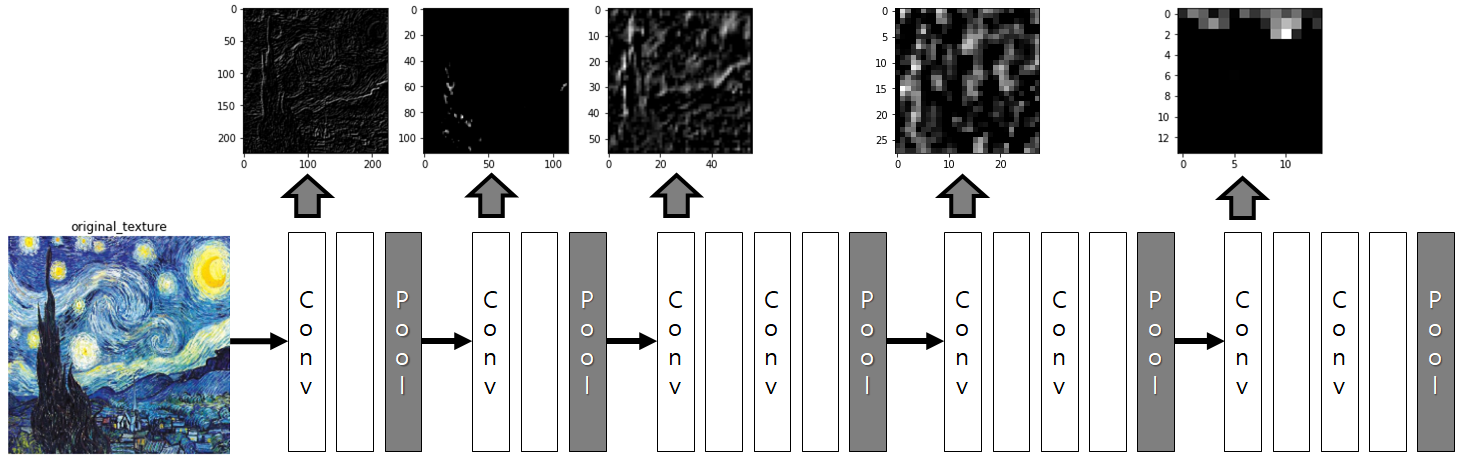

In [13]:
# 출력 계층으로 삼을 다섯 개의 컨볼루션 레이어를 고르게 선택해서 레이어의 이름을 저장.
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

# VGG-19 신경망의 기존 가중치는 학습되지 않도록 얼려줍니다. 
vgg.trainable = False 

# 위에서 설정한 출력 계층의 이름을 하나씩 불러와  
# 출력 계층으로 설정해 줍니다. 
outputs = [vgg.get_layer(name).output for name in style_layers]

# 실질적으로 모델을 생성하기 위해 Model()를 사용하여 신경망 구축을 실행합니다.
model = tf.keras.Model(inputs = [vgg.input], outputs = outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [14]:
# style_image의 type을 'float32'로 수정하고, 
style_batch = style_image.astype('float32')

# 기존 3차원의 값을 expand_dims() 를 사용하여 배치고려한 4차원으로 차원을 추가합니다. 
# 신경망의 입력조건이 4차원
# (224,224,3) → (1,224,224,3)
style_batch = tf.expand_dims(style_batch, axis=0)

# 다음은 원본 텍스처의 전처리 과정입니다. 

# VGG-19 모델이 기대하는 입력을 위해 전처리함수 preprocess_input()를 사용합니다. 
# VGG-19은 0 ~ 255 의 픽셀값이 들어온다 가정했기에 
# 기존 style_batch값에 255.0을 곱해줍니다.
style_output = model(inputs = preprocess_input(style_batch * 255.0))

# 기존 style_batch 값은 0 ~ 1 사이의 값
# style_batch * 255.0 값은 0 ~ 255 사이의 값

In [15]:
style_output

[<tf.Tensor: shape=(1, 224, 224, 64), dtype=float32, numpy=
 array([[[[0.00000000e+00, 0.00000000e+00, 8.56651402e+00, ...,
           0.00000000e+00, 2.15037327e+01, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 4.99096451e+01, ...,
           0.00000000e+00, 1.53584015e+02, 1.32206192e+02],
          [0.00000000e+00, 0.00000000e+00, 5.63849525e+01, ...,
           0.00000000e+00, 1.66537720e+02, 1.63173157e+02],
          ...,
          [0.00000000e+00, 2.49275351e+00, 5.18442802e+01, ...,
           0.00000000e+00, 1.53602661e+02, 1.39033157e+02],
          [0.00000000e+00, 0.00000000e+00, 4.41238022e+01, ...,
           0.00000000e+00, 1.47831863e+02, 1.24597595e+02],
          [0.00000000e+00, 9.45614719e+00, 6.06776390e+01, ...,
           0.00000000e+00, 1.93445709e+02, 1.89353470e+02]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [9.66431808e+01, 0.00000000e+00, 4.87764320e

In [16]:
# 다음은 gram_matrix를 구하기 위한 과정을 코드로 구축해주겠습니다. 
# 우선 신경망의 다섯 출력 레이어를 뽑아 shape 값을 확인해 보겠습니다. 
[style_output_val.shape for style_output_val in style_output]

[TensorShape([1, 224, 224, 64]),
 TensorShape([1, 112, 112, 128]),
 TensorShape([1, 56, 56, 256]),
 TensorShape([1, 28, 28, 512]),
 TensorShape([1, 14, 14, 512])]

# Gram Matrix

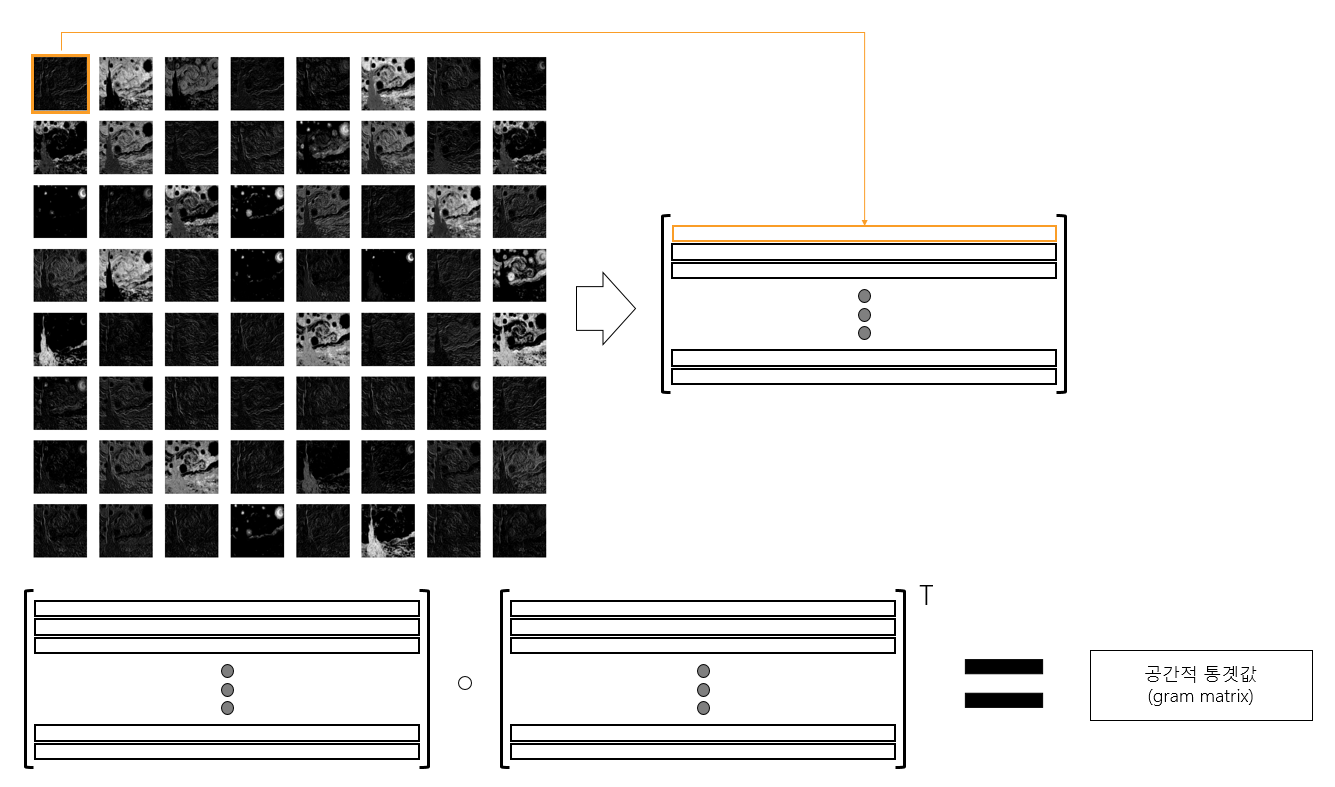

In [17]:
# 다음은 gram_matrix를 구하기 위한 과정을 코드로 구축해주겠습니다. 
# 우선 신경망의 다섯 출력 레이어를 뽑아 shape 값을 확인해 보겠습니다.
for style_output_layer in style_output:
    print("style_output_layer : \n", style_output_layer.shape)
    
    # 여기서 가장 마지막 shape인 채널값을 따로 channels 변수에 담아주겠습니다.
    # 이 변수는 이후 gram_matrix를 구하는 과정에서 1차원으로 펼쳐주기 위해 사용할 예정입니다.     
    channels = style_output_layer.shape[-1]
    print("channels : ", channels)    

    # 현재 4차원 텐서에서 앞부분의 3차원 부분을
    # 1차원으로 펼쳐주기 위해 reshape()를 사용하여 진행합니다.
    # 여기서 shape 값에 -1을 취해줌으로써 channels 값을 제외한 1,224,224의 값을 
    # 50176값으로 전환시켜 줍니다. 
    # 1차원 벡터로 변환 
    # [1,224,224,64] → [50176,64]
    # [1, 112, 112, 128] → [12544, 128]
    # ... 
    a = tf.reshape(tensor = style_output_layer, shape = [-1, channels])
    print("a.shape : \n", a.shape)

    # 이렇게 얻은 값의 첫 번째 차원값을 따로 저장하여 줍니다. 
    # 이 값은 이후 정규화 과정을 수행하는데 있어 사용할 예정입니다.  
    n = tf.shape(a)[0]
    print("tf.shape(a)[0] : \n", n)
    
    # 다음은 행렬곱을 수행하는 단계입니다. tf.matmul(a,a, transpose_a = true (a를 전치행렬))
    #[50176, 64]×[50176,64] = 연산 불가!! 
    #[64,50176]×[50176,64] = [64,64]
    gram = tf.matmul(a,a,transpose_a=True)

    print("gram.shape : ", gram.shape)
    
    # 일종의 정규화 과정입니다. 
    # 이 정규화를 하지 않게되면 앞쪽에 오는 레이어일수록 
    # 특징 추출값의 이미지가 크기 때문에 
    # Gram_matrix값 또한 커지게 됩니다.
    # 그것을 방지하고자 각 레이어의 첫 번째 shape으로 나눠줍니다.  
    # tf.cast() 타입 변화 
    result = gram / tf.cast(n, tf.float32)
    
    print(result)

style_output_layer : 
 (1, 224, 224, 64)
channels :  64
a.shape : 
 (50176, 64)
tf.shape(a)[0] : 
 tf.Tensor(50176, shape=(), dtype=int32)
gram.shape :  (64, 64)
tf.Tensor(
[[1491.9639      48.609375   413.91394   ...   82.75927    745.17194
  1249.6102   ]
 [  48.609375    26.45778     35.007442  ...    1.9241221   45.231884
    58.86152  ]
 [ 413.91394     35.007442   270.64804   ...    5.420444   368.43707
   614.98926  ]
 ...
 [  82.75927      1.9241221    5.420444  ...  208.86484     59.291565
    50.73109  ]
 [ 745.17194     45.231884   368.43707   ...   59.291565   942.6291
  1171.7306   ]
 [1249.6102      58.86152    614.98926   ...   50.73109   1171.7306
  1797.1864   ]], shape=(64, 64), dtype=float32)
style_output_layer : 
 (1, 112, 112, 128)
channels :  128
a.shape : 
 (12544, 128)
tf.shape(a)[0] : 
 tf.Tensor(12544, shape=(), dtype=int32)
gram.shape :  (128, 128)
tf.Tensor(
[[5.0463928e-03 0.0000000e+00 0.0000000e+00 ... 3.0815978e-02
  2.9997062e-02 0.0000000e+00]
 [0.0000

# gram_matrix를 구하는 과정을 함수 형식으로 만들어 주겠습니다. 

In [18]:
# 다음은 gram_matrix를 구하기 위한 함수를 구축해주겠습니다. 
# gram_matrix()에는 앞서 설정한 다섯개의 출력계층 shape 값이 들어갈 예정입니다.  
def gram_matrix(input_tensor):
  # input_tensor ▼
  # [TensorShape([1, 224, 224, 64]),
  # TensorShape([1, 112, 112, 128]),
  # TensorShape([1, 56, 56, 256]),
  # TensorShape([1, 28, 28, 512]),
  # TensorShape([1, 14, 14, 512])]
  
  # 여기서 가장 마지막 shape인 채널값을 따로 channels 변수에 담아주겠습니다.
  # 이 변수는 이후 gram_matrix를 구하는 과정에서 1차원으로 펼쳐주기 위해 사용할 예정입니다. 
  channels = int(input_tensor.shape[-1])
  
  # 현재 4차원 텐서에서 앞부분의 3차원 부분을 
  # 1차원으로 펼쳐주기 위해 reshape()를 사용하여 진행합니다.
  # 여기서 shape 값에 -1을 취해줌으로써 channels 값을 제외한 1,224,224,의 값을 
  # 50176값으로 전환시켜 줍니다. 
  # 1차원 벡터로 변환 
  # [1,224,224,64] → [50176,64]
  # [1, 112, 112, 128] → [12544, 128]
  # ...
  a = tf.reshape(tensor=input_tensor, shape = [-1, channels] )
  
  # 이렇게 얻은 값의 첫 번째 차원값을 따로 저장하여 줍니다. 
  # 이 값은 이후 정규화를 수행하는데 있어 사용할 예정입니다.  
  n = tf.shape(a)[0]  
  # n = 50176

  #행렬곱 수행(a,a, transpose_a = true (a를 전치행렬))
  #[64,50176]*[50176,64] = [64,64]
  gram = tf.matmul(a,a,transpose_a=True)
  
  # 일종의 정규화(하지 않게되면 앞쪽에 오는 레이어일수록 특징 추출값의 이미지가 크기 때문에 Gram_matrix값도 커지게 되므로 큰 영향을 주게됨)
  # tf.cast() 타입 변화
  return gram / tf.cast(n, tf.float32)

# 각 레이어의 첫 번째 필터를 통과한 값을 
# 시각화하여 출력해보겠습니다. 

style_output[0].shape : 
(1, 224, 224, 64)
style_output[1].shape : 
(1, 112, 112, 128)
style_output[2].shape : 
(1, 56, 56, 256)
style_output[3].shape : 
(1, 28, 28, 512)
style_output[4].shape : 
(1, 14, 14, 512)


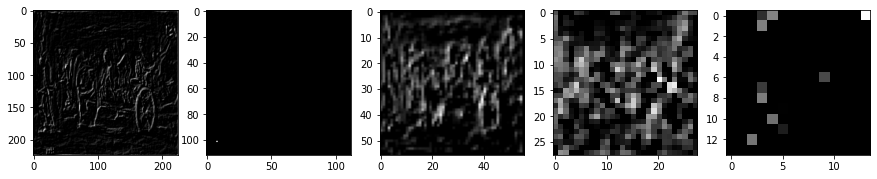

In [19]:
plt.figure(figsize=(15,15))
for i in range(5):
    print("style_output[{}].shape : ".format(i))
    print(style_output[i].shape)

    #시각화를 하려면 2차원으로 맞춰야 하기때문에 tf.squeeze()를 사용, axis = 0 을 적용하여 맨 앞의 1차원 제거)
    #(1,224,224) → (224,224)
    plt.subplot(1,5,i+1)
    plt.imshow(tf.squeeze(style_output[i][:,:,:,0],axis = 0), 
               cmap ='gray')

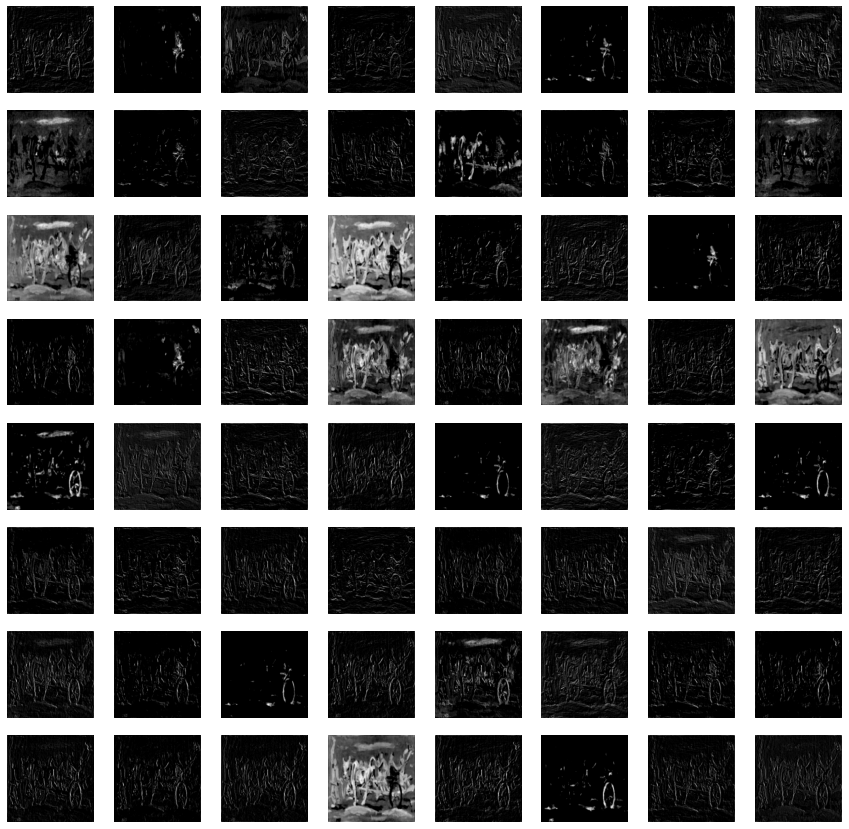

In [20]:
# 다음은 첫 번째 레이어를 통과한 모든 채널값을 
# 시각화하여 출력합니다. 

plt.figure(figsize=(15,15))
for i in range(64):
    #시각화를 하려면 2차원으로 맞춰야 하기때문에 tf.squeeze()를 사용, axis = 0 을 적용하여 맨 앞의 1차원 제거)
    #(1,224,224) → (224,224)
    plt.subplot(8,8,i+1)
    plt.imshow(tf.squeeze(style_output[0][:,:,:,i],axis = 0), 
               cmap ='gray')
    plt.axis('off')
plt.show()


# 하얀색 부분은 필터를 통과한 값이 크다는 것이며, 
# 반대로 검정색 부분은 필터를 통과한 값이 작다는 것을 의미합니다.

# 다음은 gram_matrixs 값을 시각화 하여 출력하는 과정입니다. 
원본 텍스처에서 뽑아낸 각 레이어마다의 gram matrix 값은 꽤 차이가 납니다. 
이 신경망은 보고 학습해야할 대상이 존재하지 않습니다.
일반적인 신경망은 loss값이 줄어드는 방향으로 가중치와 편향값을 조절합니다.

하지만 이러한 신경망은 loss값이 존재하지 않으며,
여기서 loss값을 대신할 값은 원본 텍스처의 gram_matrix와 
타겟 텍스처의 gram_matrix를 통해 구한 mse가 되겠습니다. 

그래서 지금과 같은 gram_matrix 값은 특정 레이어에 너무 큰 영향을 미치지 못하도록 가중치를 곱해주는 과정을 이후에 살펴보겠습니다. 

지금은 그냥 진행하도록 하겠습니다. 

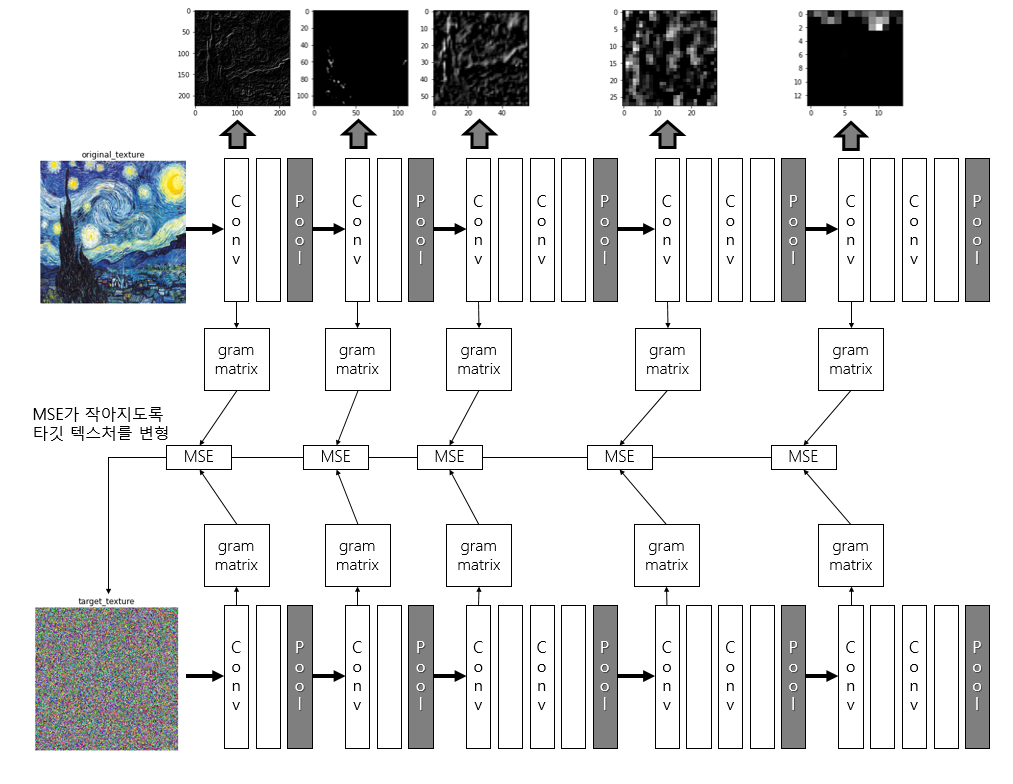

style_outputs[0] : 
 tf.Tensor(
[[1491.9639      48.609375   413.91394   ...   82.75927    745.17194
  1249.6102   ]
 [  48.609375    26.45778     35.007442  ...    1.9241221   45.231884
    58.86152  ]
 [ 413.91394     35.007442   270.64804   ...    5.420444   368.43707
   614.98926  ]
 ...
 [  82.75927      1.9241221    5.420444  ...  208.86484     59.291565
    50.73109  ]
 [ 745.17194     45.231884   368.43707   ...   59.291565   942.6291
  1171.7306   ]
 [1249.6102      58.86152    614.98926   ...   50.73109   1171.7306
  1797.1864   ]], shape=(64, 64), dtype=float32)


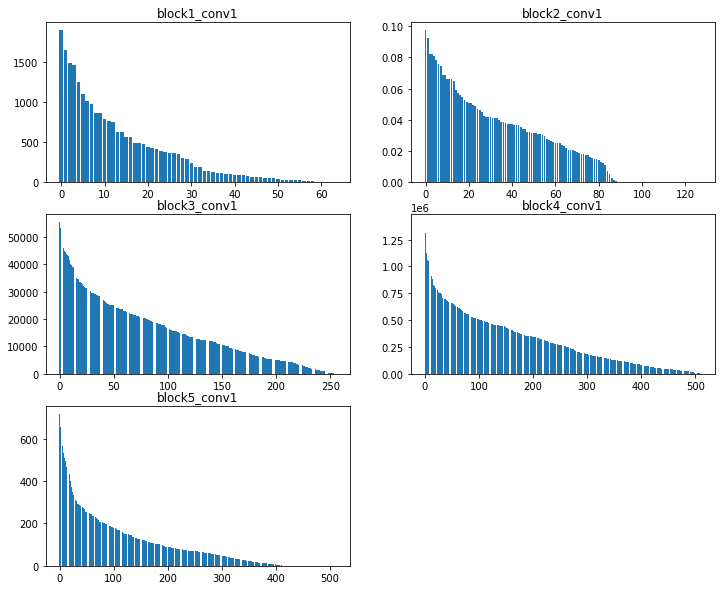

In [21]:
import numpy as np

# 원본 텍스처가 신경망의 각 레이러를 통과할 때의 Gram_matrix() 값을 구해줍니다. 
style_outputs = [gram_matrix(out) for out in style_output]

print("style_outputs[0] : \n", style_outputs[0])

plt.figure(figsize=(12,10))

for i in range(5):
  plt.subplot(3,2,i+1)

  # 도출된 Gram_matrix 값을 리스트 형태로 만들어 정렬
  # Gram_matrix 값 자체가 행렬값이기에 
  # 그 중 첫 번째 값을 뽑아 출력합니다. 
  array = sorted(style_outputs[i].numpy()[0].tolist())

  #내림차순
  array = array[::-1]

  #bar출력 
  plt.bar(range(style_outputs[i].shape[0]), array)

  #style_layers에 저장된 이름들 순차적 출력 
  plt.title(style_layers[i])

plt.show()

# 학습을 위한 함수 정의 
# 타겟 텍스처의 gram_matrix 구하기 
다음은 학습을 위한 과정입니다. 
학습을 위해서는 원본 텍스처의 gram_matrix와 타겟 텍스처의 gram_matrix 값이 필요합니다. 
그렇기에 타겟 텍스처의 gram_matrix 값을 구하기 위한 과정을 함수형식으로 
구현하여 주겠습니다.  

In [22]:
# 타깃 텍스처 업데이트를 위한 함수
def get_outputs(image):
  #신경망 연산을 위해 배치에 대한 차원 추가
    image_batch = tf.expand_dims(image, axis=0)
  #각 값에 255를 곱해주고, preprocess_input을 통한 전처리후 model에 할당 
    output = model(preprocess_input(image_batch * 255.0))
  #모델 통과 후 Gram_matrix 값 도출 
    target_outputs = [gram_matrix(out) for out in output]
    return target_outputs

# mse 구하는 과정 
다음은 mse를 구하는 과정으로, 각 텍스처의 gram_matrix를 구해 편차를 구하고, 
그 값의 제곱을 하여 하나의 값으로 더해주기 위한 과정을 코드로 구현하여 줍니다. 


In [23]:
# 우선 원본 텍스처의 gram_matrixs를 구해주는 과정입니다.
# 원본 텍스처가 신경망을 통과한 결과를 gram_matrix()에 통과시켜 줍니다.  
style_outputs = [gram_matrix(output_layer) for output_layer in style_output]

In [24]:
# 다음은 타깃 텍스처에 gram_matrix를 구하는 과정입니다. 
target_outputs = get_outputs(target_image)

In [25]:
# 다음은 편차를 구하는 과정입니다. 
for o,s in zip(target_outputs, style_outputs):
    print("o : ------------------------------\n", o)
    print("s : ------------------------------\n", s)
    print("o-s :------------------------------\n",o-s)

o : ------------------------------
 tf.Tensor(
[[6266.6597  1576.8104  1608.7686  ...  203.67558 2051.5264  3327.0447 ]
 [1576.8104  1633.1027  1026.0042  ...   88.66591 1346.2521  1458.0151 ]
 [1608.7686  1026.0042  1140.6416  ...   92.70814 1575.6978  1886.3739 ]
 ...
 [ 203.67558   88.66591   92.70814 ...  147.43855  209.11626  223.85706]
 [2051.5264  1346.2521  1575.6978  ...  209.11626 3927.8003  3922.8164 ]
 [3327.0447  1458.0151  1886.3739  ...  223.85706 3922.8164  4722.813  ]], shape=(64, 64), dtype=float32)
s : ------------------------------
 tf.Tensor(
[[1491.9639      48.609375   413.91394   ...   82.75927    745.17194
  1249.6102   ]
 [  48.609375    26.45778     35.007442  ...    1.9241221   45.231884
    58.86152  ]
 [ 413.91394     35.007442   270.64804   ...    5.420444   368.43707
   614.98926  ]
 ...
 [  82.75927      1.9241221    5.420444  ...  208.86484     59.291565
    50.73109  ]
 [ 745.17194     45.231884   368.43707   ...   59.291565   942.6291
  1171.7306   ]

In [26]:
# 이러한 과정을 함수로 구현하도록 하겠습니다. 
def get_loss(target_outputs, style_outputs):
    return tf.reduce_sum([tf.reduce_mean((o-s)**2) for o,s in zip(target_outputs, style_outputs)])

In [28]:
# 마지막으로 범위가 0 ~ 1 사이의 값을 갖도록 
# 함수를 구현하여 줍니다. 
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

# @데코레이터(Decorator)

파이썬 문법 중 장식자라는 것이 있습니다. 
함수나 클래스 앞에 오면서 이름 앞에 @를 붙이면 장식자가 되어집니다. 
장식자는 기존의 코드에 간편하게 기능을 추가합니다. 
예를들어 다음과 같습니다.  

In [29]:
# 예를들어 다음과 같은 간단한 함수가 있습니다. 
def main_function():
     print("메인 함수 시작")

main_function()



# 만약 메인 함수 앞, 뒤에 현재 시간을 출력하는 함수가 추가된 경우
# 다음과 같이 함수를 정의할 수 있습니다. 

import datetime
def main_function():
    print(datetime.datetime.now())
    print("MAIN FUNCTION START")
    print(datetime.datetime.now())

main_function()


# 만약 다음과 같은 기능을 갖는 함수를 다수 구축해야 한다면?
# 함수에 하나씩 값을 정의해 주어야 합니다.  
def main_function_1():
    print(datetime.datetime.now())
    print("MAIN FUNCTION START")
    print(datetime.datetime.now())

def main_function_2():
    print(datetime.datetime.now())
    print("MAIN FUNCTION START")
    print(datetime.datetime.now())

def main_function_3():
    print(datetime.datetime.now())
    print("MAIN FUNCTION START")
    print(datetime.datetime.now())

# 하지만 이 과정은 다소 번거롭습니다. 

# 이러한 경우 데코레이터를 정의합니다.  
# 메인 기능에 추가할 함수 즉 기능만을 정의하는 것이죠. 0

# 그리고 데코레이터는 함수를 전달받습니다. 
def datetime_decorator(func):
        def decorated():
                print(datetime.datetime.now()) # 추가해야할 기능 1
                func() # 입력받는 함수
                print(datetime.datetime.now()) # 추가해야할 기능 2
        return decorated


# 그럼 다음과 같이 메인함수에 데코레이터만 추가함으로써 
# 기능을 간단하게 추가할 수 있습니다. 

@datetime_decorator
def main_function_1():
    print("MAIN FUNCTION 1 START")

@datetime_decorator
def main_function_2():
    print("MAIN FUNCTION 2 START")

@datetime_decorator
def main_function_3():
        print("MAIN FUNCTION 3 START")

main_function_1()
main_function_2()
main_function_3()

메인 함수 시작
2021-09-24 01:47:57.014731
MAIN FUNCTION START
2021-09-24 01:47:57.014789
2021-09-24 01:47:57.015053
MAIN FUNCTION 1 START
2021-09-24 01:47:57.015111
2021-09-24 01:47:57.015165
MAIN FUNCTION 2 START
2021-09-24 01:47:57.015219
2021-09-24 01:47:57.015274
MAIN FUNCTION 3 START
2021-09-24 01:47:57.015320


# @tf.function 정의 및 활용 예시


In [ ]:
# @장식자의 역할 

# @tf.function 장식자를 사용하여 add(), dense_layer() 를 정의해보겠습니다. 
@tf.function
def add(a, b):
    return a + b

print(add(tf.ones([2, 3]), 
          tf.ones([2, 3])))

@tf.function
def dense_layer(x, w, b):
    return add(tf.matmul(x, w), b)

print(dense_layer(tf.ones([3, 2]), tf.ones([2, 2]), tf.ones([2])))


# 그리고 이번 과정에서 주요하게 사용하게 될 함수입니다. 
# 변수 하나를 생성하여 주겠습니다. 
val_1 = tf.Variable(1.0)

# 지금까지 배워온 딥러닝 신경망의 학습은 fit()를 이용해 
# 가중치가 주어진 과제를 잘 수행하도록 학습시키는 것이었습니다. 

# 하지만 여기서는 학습해야할 가중치 및 손실함수의 값이 존재하지 않습니다.(가중치 freeze and 'loss'값 부재) 
# 존재하는 것은 원본 텍스처, 타겟 텍스처 그리고 각 gram_matrixs 그리고 mse 입니다. 

# 텐서플로우의 tf.GradientTape() 함수는 어떤 식이 들어가더라도 
# 자동 미분을 통해 '입력에 대한 손실'을 구한 뒤 '다른 변수에 대한 기울기'를 계산합니다.  
#보통 GradientTape()은 다음과 같이 약어를 주어 사용합니다.
with tf.GradientTape() as tape:
    # result 라는 수식을 하나 정의하겠습니다. 
    result = add(val_1, 1.0)
    print("result : ", result)

# 그리고 다음과 같이 result 변수의 기울기를 구해줄 수 있습니다.   
print(tape.gradient(result, val_1))

tf.Tensor(
[[2. 2. 2.]
 [2. 2. 2.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[3. 3.]
 [3. 3.]
 [3. 3.]], shape=(3, 2), dtype=float32)
result :  tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [30]:
# 경사하강법 최적화 수행을 위한 Adam()를 구축하여 주겠습니다. 
opt = tf.optimizers.Adam(learning_rate=0.02)

# 앞서 배운 @tf.function()를 활용하여 
# 기존의 코드에 간편하게 자동 미분 기능을 추가해주겠습니다.  

# 학습을 위한 함수를 정의합니다. 
@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:

        # 입력 이미지 텍스처에 대한 Gram_matirx 결과 출력
        target_outputs = get_outputs(image)
        # 원본과 타깃 텍스처간의 loss(mse)산출
        loss = get_loss(target_outputs, style_outputs)

    # 역전파 과정 
    # tape의 gradient()를 사용하여 입력값인 image에 대한 loss의 기울기를 구해줍니다.  
    grad = tape.gradient(loss, image)
    # grad에 옵티마이저를 적용한 학습을 통해 image를 개선시킨다.
    # apply_gradients(grads_and_vars) : List of (gradient, variable) pairs
    opt.apply_gradients([(grad, image)])
    # 개선된 image를 마지막으로 clip 함수를 적용시켜 새로운 image를 생성(assing) 
    image.assign(clip_0_1(image))

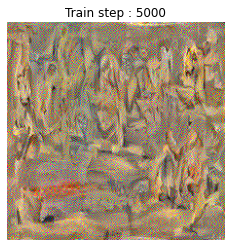

Total time: 59.3


In [31]:
import IPython.display as display # 이미지 출력을 도와주는 라이브러리   
import time    # 실행시간 추적 
import imageio # 합성된 텍스쳐 저장 

start = time.time() # 학습이 시작된 현재 시간을 담아줍니다. 

# 텐서플로우의 그래프 연산을 위한 변수화 과정
# 업데이트가 되어야 하는 대상은 타겟 텍스처이기에 이를 tf변수화 과정을 진행해줍니다. 
image = tf.Variable(target_image)  

epochs = 50            
steps_per_epoch = 100  # 한 번의 에폭을 위한 누적 에폭 수(미니배치 개념)

step = 0 # 스텝 수 

#에폭 수 만큼 반복 
for n in range(epochs): 
  
  for m in range(steps_per_epoch):
    step += 1          # 반복 스텝 수 
    print('.',end = '')
    train_step(image)  # train_step() 함수를 실행하여 타켓 텍스처(image)학습 

   # 저장해주는 조건식 (에폭 500 단위 혹은 490번째)

  if n % 5 == 0 or n == epochs -1 :
    #저장해주기 / '파일명.png'
    imageio.imwrite('style_epoch_{0}.png'.format(n), image.read_value().numpy())

  #100번의 에폭이 끝나면 지워준다.
  display.clear_output(wait = True)

  #저장된 이미지 출력
  plt.imshow(image.read_value())

  #train step 출력
  plt.title('Train step : {}'.format(step))
  plt.axis('off')
  plt.show()

#끝나는 시간 기록
end = time.time()
#end-start 걸린 시간 출력 
print("Total time: {:.1f}".format(end-start))

# 성능개선을 위한 알고리즘 
### 지금 출력된 이미지는 약간 자글자글한 노이즈가 포함되어 있다는 것을 느낄 수 있습니다.
### 이러한 이미지를 좀 더 매끄럽게 만들어 주기 위한 과정을 함께 살펴보겠습니다. 
### 이미지가 자글자글하다는 것은 인접한 픽셀들끼리의 값 차이가 난다는 것이며, 
### 이를 줄여 매끄러운 이미지로 출력해주겠습니다.

In [32]:
# 우선 얼마나 이미지가 자글자글한지 확인하기 위하여 
# 인접한 픽셀들의 편차 값을 구해보겠습니다.
# 만약 이 편차들의 값이 크다면 인접한 픽셀들의 이미지 차이가 크다는 것이며,
# 이것은 자글자글하다는 것을 의미하게 됩니다. 

def high_pass_x_y(image):
    # 열 기준 서로 인접한 픽셀들끼리의 편차를 구해줍니다. 
    x_var = image[:,1:,:] - image[:,:-1,:]
    # 행 기준 서로 인접한 픽셀들끼리의 편차를 구해줍니다. 
    y_var = image[1:,:,:] - image[:-1,:,:]
    return x_var, y_var 

In [ ]:
print(style_image[:,1:,:].shape)
print(style_image[:,:-1,:].shape)

print(style_image[1:,:,:].shape)
print(style_image[:-1,:,:].shape)

(224, 223, 3)
(224, 223, 3)
(223, 224, 3)
(223, 224, 3)


In [33]:
x_var, y_var = high_pass_x_y(style_image)
print(x_var.shape, y_var.shape)

(224, 223, 3) (223, 224, 3)


In [34]:
# 인접한 픽셀간의 차이가 작다는 것을 하나의 정량적 지표로 확인하기 위해 
# 인접한 픽셀간의 mse를 구해보도록 하겠습니다. 
# 이를 함수로 구현해주도록 하겠습니다. 
# 그리고 이는 손실이라 부를 수 있겠네요.
def total_variation_loss(image):
    x_var, y_var = high_pass_x_y(image)
    return tf.reduce_mean(x_var ** 2) + tf.reduce_mean(y_var ** 2)

# 실제 이미지의 인접한 픽셀들간의 mse를 구해보겠습니다. 
print("total_variation_loss(style_image) : ", total_variation_loss(style_image))

# 무작위로 생성한 이미지의 인접한 픽셀들 간의 mse를 구해보겠습니다. 
print("total_variation_loss(tf.random.uniform(style_image.shape)) : ", total_variation_loss(tf.random.uniform(style_image.shape)))

# 결과값을 살펴보니 무작위로 생성된 노이즈 텍스처의 mse값은 매우 크다는 것을 알 수 있습니다. 

total_variation_loss(style_image) :  tf.Tensor(0.0067197175185910105, shape=(), dtype=float64)
total_variation_loss(tf.random.uniform(style_image.shape)) :  tf.Tensor(0.3332572, shape=(), dtype=float32)


In [35]:
# 임의의 가중치 설정
style_weight = 0.1
total_variation_weight = 1e9 #1000000000.0

# 학습을 위한 함수를 재정의합니다. 
@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:

        # 원본 텍스처에 대한 Gram_matirx 결과 출력
        target_outputs = get_outputs(image)
        
        ######## 추가된 코드 ########
        # 원본과 타깃 텍스처간의 loss(mse) 산출 후 임의의 가중치와 곱해줍니다.

        # 각 gram_matrix의 mse를 구한 값에 임의의 가중치를 곱해줍니다.
        # 여기서의 가중치는 기존 mse 값이 크기에 작은 임의의 가중치를 곱해줍니다.   
        loss = style_weight * get_loss(target_outputs, style_outputs)

        # 인접한 픽셀간의 편차를 의미하는 total_variation_loss 손실값에 
        # 임의의 가중치를 곱해 준 값을 기존 loss에 더해줍니다.
        
        loss += total_variation_weight * total_variation_loss(image)

        # 그리고 이 loss가 줄어든다는 것은 원본 텍스처와 타겟 텍스처가 비슷해진다는 것을 의미하지만
        # 동시에 인접한 픽셀의 값 또한 줄어든다는 것을 의미하게 됩니다.  

    # 역전파 과정 
    # tape의 gradient()를 사용하여 입력값인 image에 대한 loss의 기울기를 구해줍니다.  
    grad = tape.gradient(loss, image)
    # grad에 옵티마이저를 적용한 학습을 통해 image를 개선시킨다.
    # apply_gradients(grads_and_vars) : List of (gradient, variable) pairs
    opt.apply_gradients([(grad, image)])
    # 개선된 image를 마지막으로 clip 함수를 적용시켜 새로운 image를 생성(assing) 
    image.assign(clip_0_1(image))

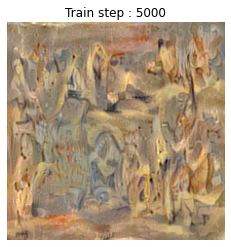

Total time: 58.8


In [36]:
# 파일 저장 명을 수정하여 주겠습니다. 

import IPython.display as display # 이미지 출력을 도와주는 라이브러리   
import time    # 실행시간 추적 
import imageio # 합성된 텍스쳐 저장 

start = time.time() # 학습이 시작된 현재 시간을 담아줍니다. 

# 텐서플로우의 그래프 연산을 위한 변수화 과정
# 업데이트가 되어야 하는 대상은 타겟 텍스처이기에 이를 tf변수화 과정을 진행해줍니다. 
image = tf.Variable(target_image)  

epochs = 50            
steps_per_epoch = 100  # 한 번의 에폭을 위한 누적 에폭 수(미니배치 개념)

step = 0 # 스텝 수 

print("AI Training Start")
#에폭 수 만큼 반복 
for n in range(epochs): 
  
  for m in range(steps_per_epoch):
    step += 1          # 반복 스텝 수 
    print(">", end = '')
    train_step(image)  # train_step() 함수를 실행하여 타켓 텍스처(image)학습 

   # 저장해주는 조건식 (에폭 500 단위 혹은 490번째)

  if n % 5 == 0 or n == epochs -1 :
    ################ 코드 수정 ###################
    # 저장해주기 / '파일명.png'
    imageio.imwrite('style_variation_epoch_{0}.png'.format(n), image.read_value().numpy())

  #100번의 에폭이 끝나면 지워준다.
  display.clear_output(wait = True)

  #저장된 이미지 출력
  plt.imshow(image.read_value())

  #train step 출력
  plt.title('Train step : {}'.format(step))
  plt.axis('off')
  plt.show()

#끝나는 시간 기록
end = time.time()
#end-start 걸린 시간 출력 
print("Total time: {:.1f}".format(end-start))

# 컨볼루션 신경망을 사용한 신경 스타일 전이 


## 신경 스타일 전이는 앞서 배운 gram_matrix를 이용한 텍스처 합성에 
## 한 가지를 더 추가한 것입니다. 
## 바로 **컨텐츠 텍스처(content texture)** 입니다. 
## 이번에 타깃 텍스처를 생성하는 방법은 다음과 같습니다. 
---
---
## style texture와 gram matrix의 mse를 구하는 과정까지는 동일합니다. 
## 여기서 컨텐츠 텍스처와는 픽셀 값의 차이인 mse를 구합니다. 


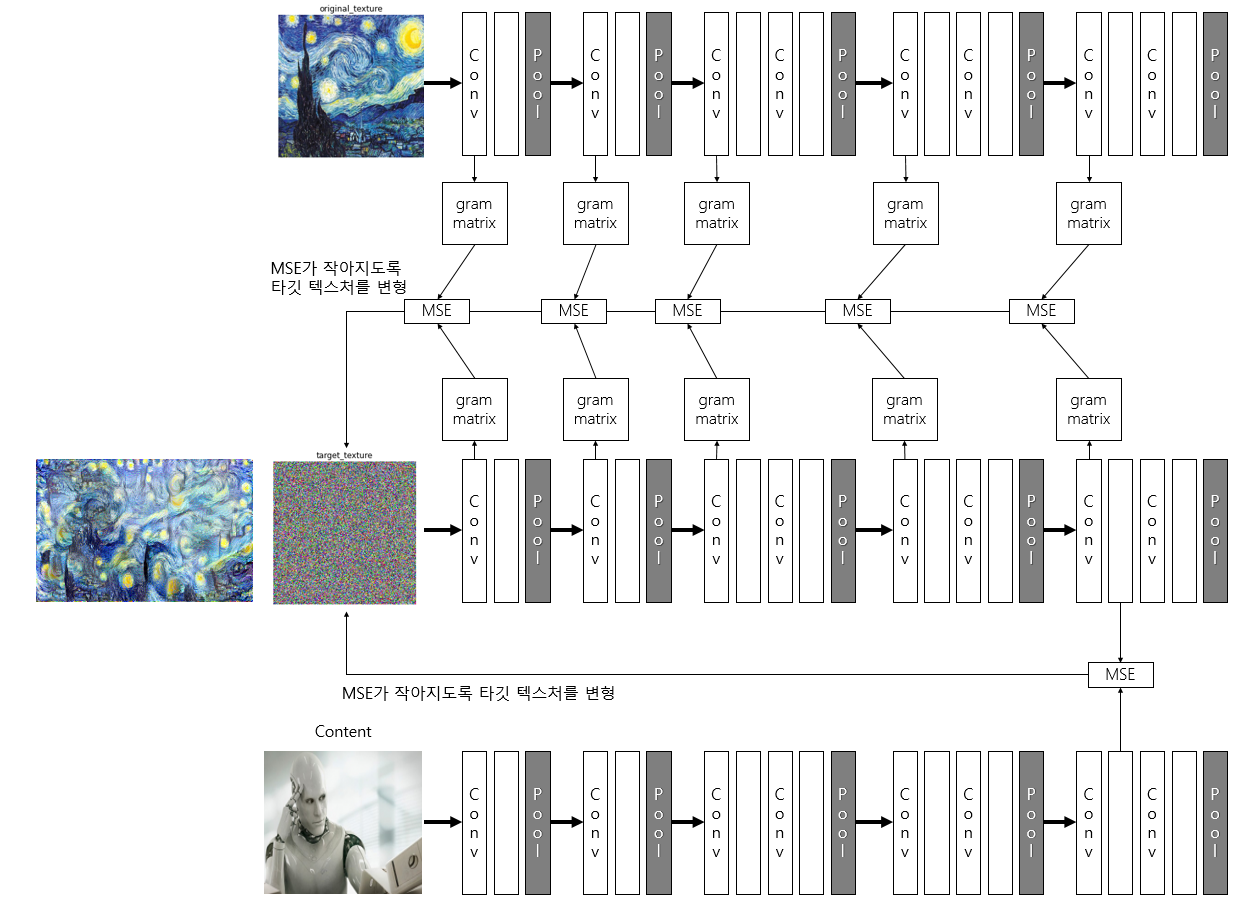

## 이전 style loss를 구하기 위해서는 각 다섯 개의 레이어에서 
## gram matrix 값을 계산하였습니다. 

## 하지만 이번 content loss 를 구하기 위해서는 
## 뒤 쪽의 한 개 레이어에서 얻은 특징 추출값만 사용합니다. 
---
---
## content 복원에서 앞쪽 레이어의 특징 추출로 만든 복원 결과는 거의 완벽하지만
## 단순 픽셀값을 복사하는 수준에 그칠 뿐이고, 
## 뒤쪽 레이어의 특징 추출로 만든 복원 결과는 그림의 세부 픽셀이 깨지지만 
## 집의 배치, 창문의 위치 등 전체적인 구조는 유지가 됩니다. 

## 신경 스타일 전이로 얻고 싶은 결과는 단순한 픽셀의 복사가 아닌 
## content 구조의 모사이기 때문에 뒤쪽의 레이어를 사용하고자 합니다. 
---
---
## style loss를 구할 때 처럼 content loss를 구할 때 앞쪽 레이어의 
## 특징 추출을 같이 사용할 수도 있습니다.

## 다만 이 경우 content 이미지의 세부를 그대로 복사하는 결과를 불러올 수 있기 때문에 
## 논문에서도 content loss를 계산하기 위해서는 
## 뒤쪽의 레이어 중 한 개의 특징 추출만 사용했습니다. 




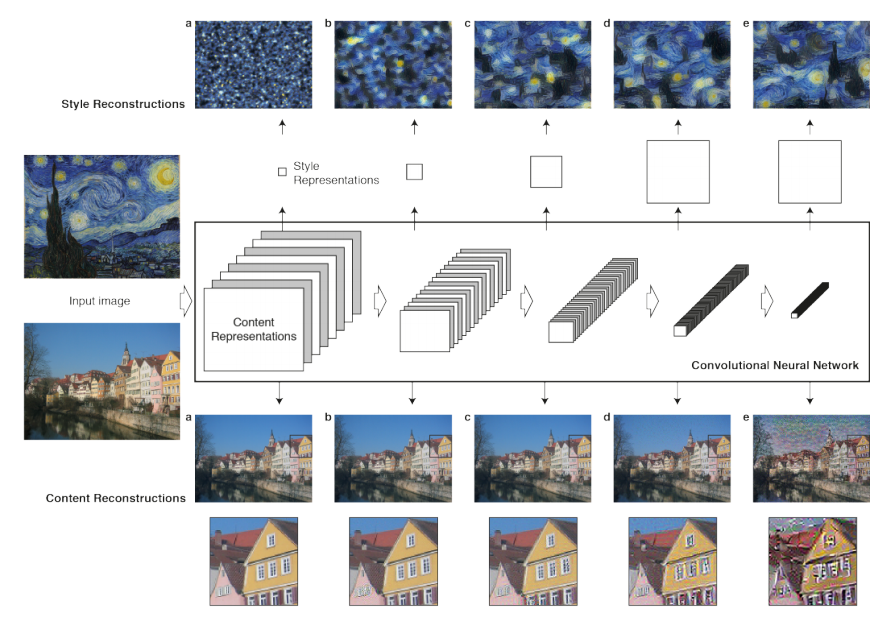

In [37]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
# 이번에 content texture로 사용할 이미지를 받아오는 코드입니다.
# 만약에 따로 하고 싶은 이미지를 사용해도 무관합니다. 

# 따로 이미지를 받아오고 싶은 경우 
content_image = plt.imread('/content/ai_robot.jpg')

# 예제 이미지를 사용하고 싶은 경우
# content_path = tf.keras.utils.get_file('content.jpg', 'http://bit.ly/2mAfUX1')
# content_image = plt.imread(content_path)

In [ ]:
# 이미지 전처리 후 최대 길이를 512로 맞춰주겠습니다. 
max_dim = 512

# 한장의 이미지이기에 마지막 shape값은 채널이므로 
# 채널을 제외한 가로와 세로 중 더 긴 값을 따로 long_dim 이라는 변수에 저장합니다.   
long_dim = max(content_image.shape[:-1])
print("long_dim : ", long_dim)

# 그리고 받아온 이미지의 가장 긴 길이의 값을 512로 나눠 스케일 값을 하나 생성해 줍니다.   
scale = max_dim / long_dim
print("scale : ", scale)

# 앞서 구한 scale 값을 각 높이와 폭 값을 곱해주어 새로운 
# 리사이징된 값을 구해줍니다.  
new_height = int(content_image.shape[0] * scale)
new_width  = int(content_image.shape[1] * scale)
print("new_height : ", new_height)
print("new_width : ", new_width)

# 얻어진 값을 활용하여 이미지 크기를 조정합니다. 
content_image = cv2.resize(content_image, dsize=(new_width, new_height))

# 정규화 과정까지 진행하여 주겠습니다. 
content_image = content_image / 255.0

long_dim :  1280
scale :  0.4
new_height :  306
new_width :  512


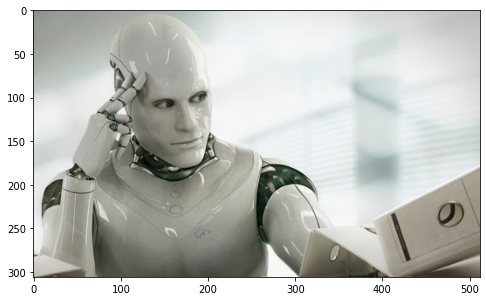

In [ ]:
# 시각화 과정을 통해 이미지를 출력해 봅니다.  
plt.figure(figsize=(8,8))
plt.imshow(content_image)
plt.show()

## 여기서 주의해야 할 점은 content 텍스처와 타깃 텍스처의 크기가 
## 같아야 한다는 것입니다. 
## 이 둘은 서로 특징 추출값의 픽셀을 mse로 비교해야 하기 때문에 
## 크기가 다르다면 mse를 구할 수 가 없습니다. 

## 반면 style 텍스처는 타깃 텍스처와 크기다 달라도 상관없습니다. 

In [ ]:
# 이미지를 가저와 전처리를 수행하여 주겠습니다. 
# type을 float 32로 수정하고,
content_batch = content_image.astype('float32')
# 신경망에 넣기 위하여 1차원을 추가해 주겠습니다. 
content_batch = tf.expand_dims(content_batch, axis = 0)
print("content_batch.shape : ", content_batch.shape)

# content 텍스처가 신경망을 통과하고 출력되어질 레이어 하나를 선택합니다. 
# 논문에서 채택한 다섯 번째 블럭의 2번째 합성곱 신경망을 
# 출력 레이어로 합니다. 
content_layers = ['block5_conv2']

# 역시나 학습을 막기위해 레이어를 얼려줍니다.  
vgg.trainable  = False

# 출력 레이어를 생성하여 줍니다. 
outputs        = [vgg.get_layer(layer_name).output for layer_name in content_layers]

# 신경망을 생성하기 위한 함수를 정의합니다.  
model_content  = tf.keras.Model(inputs = [vgg.input], outputs = outputs)

# 신경망의 출력계층을 통과하게 되었을때의 결과값(feature_map)을 
# 따로 생성하여 줍니다.  
content_output = model_content(preprocess_input(content_batch * 255.0))

content_batch.shape :  (1, 306, 512, 3)


In [ ]:
print(content_output)

In [ ]:
# 컨텐츠 텍스처 또한 차원 추가 및 입력 데이터를 신경망에 통과시켜 
# 출력값을 얻어낼 수 있도록 함수를 정의합니다. 
def get_content_output(image):
    image_batch = tf.expand_dims(image, axis = 0)
    output = model_content(preprocess_input(image_batch * 255.0))
    return output

In [ ]:
# 타깃 텍스처와 content 텍스처의 mse를 구하기 위한 과정을 
# 함수로 정의합니다. 
# 이 값이 작아질 수록 content 텍스처의 값은 
# 타겟 텍스처와 비슷해지는 결과를 얻어낼 수 있습니다.
# 즉 타겟 텍스처의 질감, 화풍 등과 비슷한 이미지를 얻어낼 수 있게 되는 것이죠. 
def get_content_loss(image, content_output):
    return tf.reduce_sum(tf.reduce_mean(image - content_output) ** 2)

In [ ]:
# 학습률이 높을수록 스타일 전이가 강하게 이루어집니다. 
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1 = 0.99, epsilon = 1e-1)

In [ ]:
total_variation_weight = 1e9
style_weight           = 1e-2
content_weight         = 1e4

In [ ]:
@tf.function()
def train_step(image): # 컨텐츠 이미지가 들어올 예정입니다.
    with tf.GradientTape() as tape:

        # 컨텐츠 이미지에 대한 Gram_matirx 결과 출력
        content_gram_outputs = get_outputs(image)

        # 컨텐츠 텍스처가 신경망을 통과한 결과를 변수화 시켜줍니다. 
        output2 = get_content_output(image)

        # 첫 번째 
        # 컨텐츠 텍스처 gram_matrix(content_gram_outputs)와 스타일 텍스처 gram_matrix(style_outputs) 사이의 
        # loss를 구하는 과정입니다. 
        loss = style_weight * get_loss(content_gram_outputs, style_outputs)
        
        # 두 번째 
        # 타깃 텍스처와 content 텍스처의 mse를 구해 기존 loss값에 추가합니다.  
        loss += content_weight * get_content_loss(image = output2, content_output = content_output)
        
        # 세 번째 
        # 추가로 인접한 픽셀과의 차이를 최소화 시키기 위한 loss도 추가하여 주겠습니다. 
        loss + total_variation_weight * total_variation_loss(image = image)
   
    # 이렇게 얻은 누적 loss값의 기울기를 구하기 위한 과정을 
    # tf.function()의 tape를 통해 구해줍니다. 
    grad = tape.gradient(loss,image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

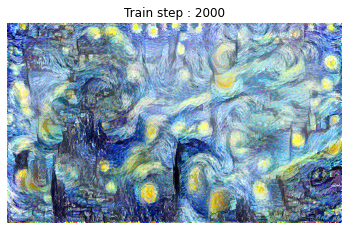

Total time: 229.8


In [ ]:
# 파일 저장 명을 수정하여 주겠습니다.

import IPython.display as display # 이미지 출력을 도와주는 라이브러리   
import time    # 실행시간 추적 
import imageio # 합성된 텍스쳐 저장 

start = time.time() # 학습이 시작된 현재 시간을 담아줍니다. 

# 텐서플로우의 그래프 연산을 위한 변수화 과정
# 업데이트가 되어야 하는 대상은 content 텍스처이기에 
# 이를 tf 변수화 과정을 진행해줍니다. 
image = tf.Variable(content_image.astype('float32'))  

epochs = 20            
steps_per_epoch = 100  # 한 번의 에폭을 위한 누적 에폭 수(미니배치 개념)

step = 0 # 스텝 수 

#에폭 수 만큼 반복 
print("AI Training Start")
for n in range(epochs): 
  print("AI Training...")
  for m in range(steps_per_epoch):
    step += 1          # 반복 스텝 수 
    print(">",end='')
    train_step(image)  # train_step() 함수를 실행하여 타켓 텍스처(image)학습 

   # 저장해주는 조건식 (에폭 500 단위 혹은 490번째)

  if n % 5 == 0 or n == epochs -1 :
    ################ 코드 수정 ###################
    # 저장해주기 / '파일명.png'
    imageio.imwrite('style_content_transfer_epoch_{0}.png'.format(n), image.read_value().numpy())

  #100번의 에폭이 끝나면 지워준다.
  display.clear_output(wait = True)

  #저장된 이미지 출력
  plt.imshow(image.read_value())

  #train step 출력
  plt.title('Train step : {}'.format(step))
  plt.axis('off')
  plt.show()

#끝나는 시간 기록
end = time.time()
#end-start 걸린 시간 출력 
print("Total time: {:.1f}".format(end-start))